In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
# test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [6]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [7]:
multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
                             'AEDAHO_T9_V2','AEWIHO_T9AV2'] # choose column with which the following work will be conducted
univariate_column_label=['AEDAHO_T9_V2']
multivariate_data=test_new.iloc[2000:20000][multivariate_column_label] #just for checking whether it is working or not
print(multivariate_data.head())

                     DEWIHOBT9_I0  AEDATZ_HONP0  AEDATZK_ASP0  AEDATZ_HO_V0  \
dateTime                                                                      
2019-04-10 10:31:00         100.0     96.866635     97.101421     48.911624   
2019-04-10 10:30:00         100.0     96.632042     96.866710     50.347512   
2019-04-10 10:29:00         100.0     96.537905     96.757515     50.418591   
2019-04-10 10:28:00         100.0     96.623773     96.841708     49.995617   
2019-04-10 10:27:00         100.0     97.133664     97.332433     47.940286   

                     AEDAHO_T9_V2  AEWIHO_T9AV2  
dateTime                                         
2019-04-10 10:31:00     64.434328     81.382283  
2019-04-10 10:30:00     67.651555     79.197810  
2019-04-10 10:29:00     68.233293     72.862086  
2019-04-10 10:28:00     65.349113     71.342960  
2019-04-10 10:27:00     60.423638     70.749025  


In [8]:

size_column = len(multivariate_column_label)
print(size_column)

6


In [9]:
multivariate_data=multivariate_data.loc[::-1]
print(multivariate_data.head())

                     DEWIHOBT9_I0  AEDATZ_HONP0  AEDATZK_ASP0  AEDATZ_HO_V0  \
dateTime                                                                      
2019-03-20 14:00:00         100.0     96.664227     97.056779     58.849192   
2019-03-20 14:01:00         100.0     96.768799     97.171833     59.596989   
2019-03-20 14:02:00         100.0     96.780630     97.152067     57.521160   
2019-03-20 14:03:00         100.0     96.902255     97.253856     55.506700   
2019-03-20 14:04:00         100.0     96.908991     97.255520     54.717202   

                     AEDAHO_T9_V2  AEWIHO_T9AV2  
dateTime                                         
2019-03-20 14:00:00     80.655537     82.164653  
2019-03-20 14:01:00     81.089756     84.719391  
2019-03-20 14:02:00     80.335200     85.343840  
2019-03-20 14:03:00     75.924448     85.319617  
2019-03-20 14:04:00     73.998452     84.241223  


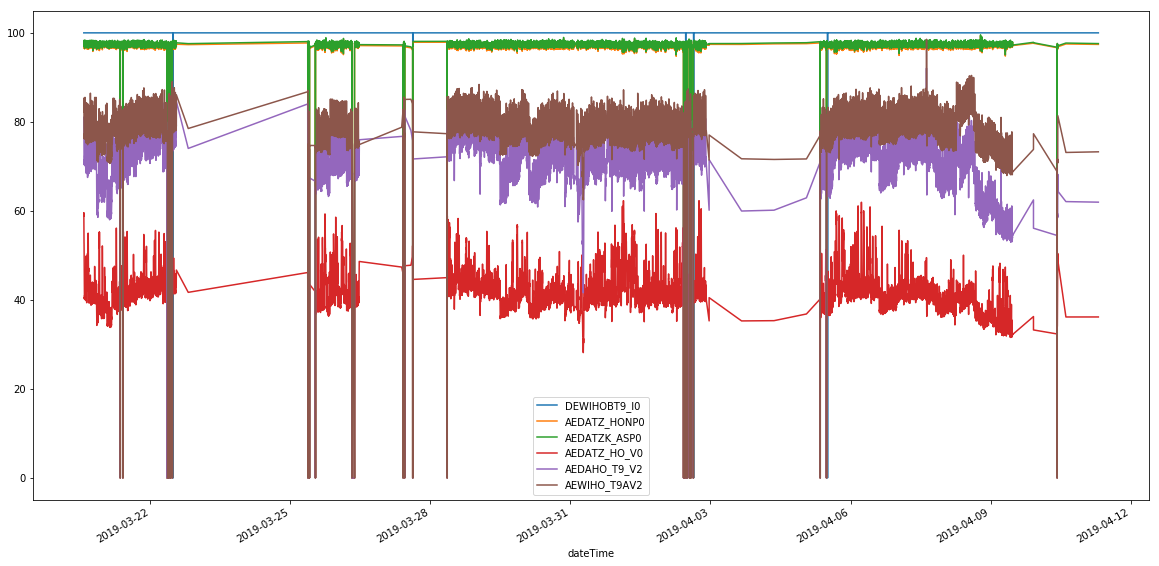

In [11]:
multivariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [10]:
# Below the row has deleted where DEWIHOBT9_I0 has 'zero' value 

zero_index=[]
zero_index=np.array(zero_index)
for index, value in multivariate_data.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

size of zero_index:  7


In [11]:
if zero_index.size > 0:
    multivariate_data_modify = multivariate_data.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    multivariate_data_modify = multivariate_data

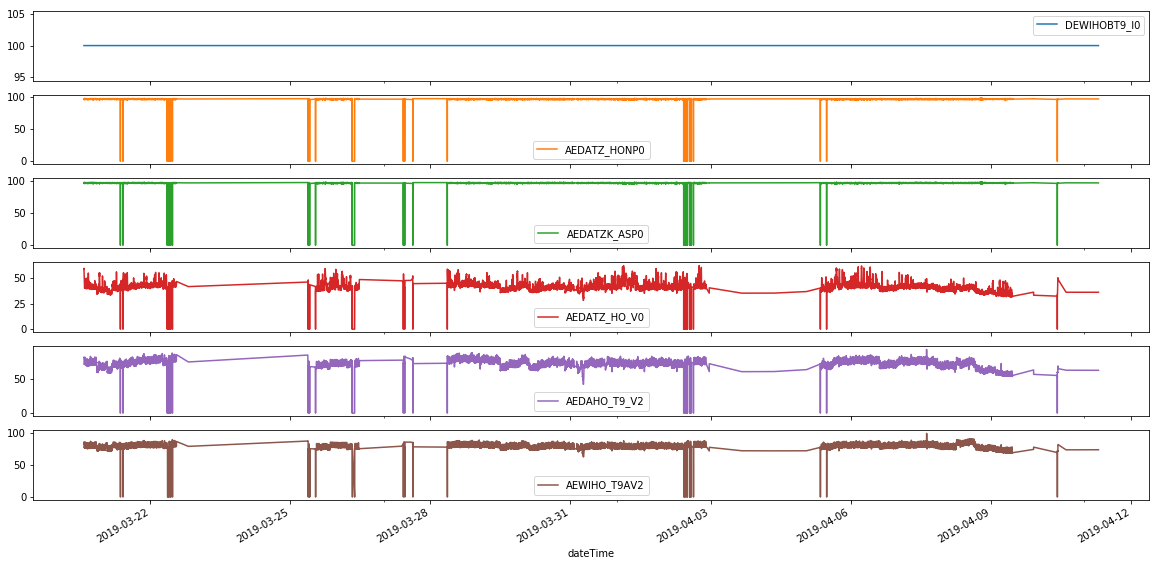

In [16]:
bx = multivariate_data_modify.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [12]:
from numpy import nan
multivariate_data_drop_zero= multivariate_data_modify.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

print('shape of multivariate_data: ',multivariate_data.shape)
print('shape of multivariate_data_modify: ', multivariate_data_modify.shape)
print('shape of multivariate_data_drop_zero: ',multivariate_data_drop_zero.shape)

shape of multivariate_data:  (18000, 6)
shape of multivariate_data_modify:  (17993, 6)
shape of multivariate_data_drop_zero:  (17879, 6)


In [11]:
# remove this line if you want do not want to count mean. Just comment it and uncomment the below lines.
multi_mean=multivariate_data.mean()
multivariate_data_mean= multivariate_data.replace(0,multi_mean)

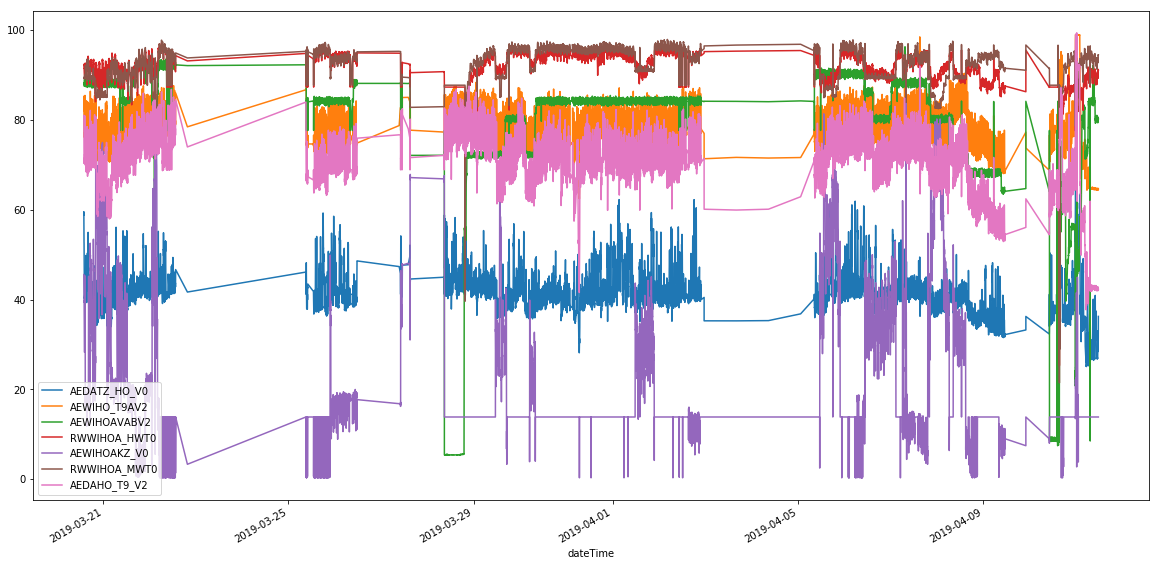

In [12]:
multivariate_data_mean.plot()
plt.show()

In [13]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(multivariate_data_mean)
# col_label=['AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0','AEWIHOAKZ_V0','RWWIHOA_MWT0','AEDAHO_T9_V2']
df_normalized = pd.DataFrame(np_scaled,index=multivariate_data.index,columns=multivariate_column_label)

In [40]:
np_unscaled=min_max_scaler.inverse_transform(np_scaled)
df_unnormalized=pd.DataFrame(np_unscaled,index=multivariate_data.index,columns=multivariate_column_label)

In [41]:
df_unnormalized.head()

,AEDATZ_HO_V0,AEWIHO_T9AV2,AEWIHOAVABV2,RWWIHOA_HWT0,AEWIHOAKZ_V0,RWWIHOA_MWT0,AEDAHO_T9_V2
dateTime,,,,,,,
2019-03-20 14:00:00,58.849192,82.164653,88.135228,92.213203,45.592339,89.399347,80.655537
2019-03-20 14:01:00,59.596989,84.719391,88.256994,92.301521,44.759943,89.539277,81.089756
2019-03-20 14:02:00,57.521160,85.343840,88.350813,92.459522,45.274554,89.598665,80.335200
2019-03-20 14:03:00,55.506700,85.319617,88.098498,92.295853,45.078444,89.410738,75.924448
2019-03-20 14:04:00,54.717202,84.241223,88.145209,92.287743,42.677696,89.359484,73.998452


In [16]:
# dataset=np.array(multivariate_data_mean)
dataset=np.array(df_normalized)

NumberOfElements=int(len(dataset)*0.85)
print('Number of Elements for training: ',NumberOfElements)
print('dataset length: ',len(dataset))

train_input=dataset[0:NumberOfElements,0:-1]
print('train_input shape: ',train_input.shape)
train_output=dataset[0:NumberOfElements,-1]
print('train_output shape: ',train_output.shape)

test_input=dataset[NumberOfElements:len(dataset),0:-1]
print('test_input shape: ',test_input.shape)
test_output=dataset[NumberOfElements:len(dataset),-1]
print('test_output shape: ',test_output.shape)

# print('train data size: ',train_data.shape,'\ntest data size: ',test_data.shape)

Number of Elements for training:  16575
dataset length:  19500
train_input shape:  (16575, 6)
train_output shape:  (16575,)
test_input shape:  (2925, 6)
test_output shape:  (2925,)


# How to apply selected feature in the  machine learning model?? Just do the selection and create a new dataframe with the selected feature and then fed it to the machine learning model.

In [18]:
df_normalized.head()

,AEDATZ_HO_V0,AEWIHO_T9AV2,AEWIHOAVABV2,RWWIHOA_HWT0,AEWIHOAKZ_V0,RWWIHOA_MWT0,AEDAHO_T9_V2
dateTime,,,,,,,
2019-03-20 14:00:00,0.793915,0.538414,0.909715,0.930334,0.493862,0.887801,0.695416
2019-03-20 14:01:00,0.811504,0.608305,0.911054,0.931562,0.484790,0.889629,0.702452
2019-03-20 14:02:00,0.762679,0.625388,0.912085,0.933760,0.490399,0.890405,0.690225
2019-03-20 14:03:00,0.715297,0.624726,0.909311,0.931483,0.488261,0.887949,0.618750
2019-03-20 14:04:00,0.696728,0.595224,0.909825,0.931371,0.462096,0.887280,0.587540


# below try to make dataset for feature selection. directly make from panda dataframe.

In [13]:
train_feature_1 = multivariate_data_drop_zero.iloc[:,:-1]
target_feature_1 = multivariate_data_drop_zero.iloc[:,-1]
a_1 = pd.DataFrame(target_feature_1)

train_feature_2 = train_feature_1.astype(int)
a_2 = a_1.astype(int)


# target=pd.DataFrame(train_output,index=multivariate_data.index,columns=multivariate_column_label[-1])

In [14]:
print(type(train_feature_1))
print(type(train_feature_2))
print(type(target_feature_1))
print(type(a_1))
print(type(a_2))
# print(train_feature.head())
# print(target_feature.head())
print(a_1.head())
print(a_2.head())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
                     AEWIHO_T9AV2
dateTime                         
2019-03-20 14:00:00     82.164653
2019-03-20 14:01:00     84.719391
2019-03-20 14:02:00     85.343840
2019-03-20 14:03:00     85.319617
2019-03-20 14:04:00     84.241223
                     AEWIHO_T9AV2
dateTime                         
2019-03-20 14:00:00            82
2019-03-20 14:01:00            84
2019-03-20 14:02:00            85
2019-03-20 14:03:00            85
2019-03-20 14:04:00            84


In [65]:
# train_feature=train_feature.astype(float)
# target_feature=target_feature.astype(float)

# below trying to do the feature selection but problem occurs with the unknown label type of array which is pointing to the targetted variable.

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=2)
fit = bestfeatures.fit(train_feature_2,a_2)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train_feature_2.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))  #print 10 best features

          Specs        Score
4  AEDAHO_T9_V2  5513.054111
3  AEDATZ_HO_V0  1757.679508
2  AEDATZK_ASP0     0.245852
1  AEDATZ_HONP0     0.213595


# Problem also here

In [16]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature extraction
test = SelectKBest(score_func=chi2, k=4)

fit = test.fit(train_feature_2,a_2)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(train_feature_2)
# Summarize selected features
print(features[0:5,:])

[1.642e-27 2.136e-01 2.459e-01 1.758e+03 5.513e+03]
[[96 97 58 80]
 [96 97 59 81]
 [96 97 57 80]
 [96 97 55 75]
 [96 97 54 73]]


# correlation. followed this link for doing https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

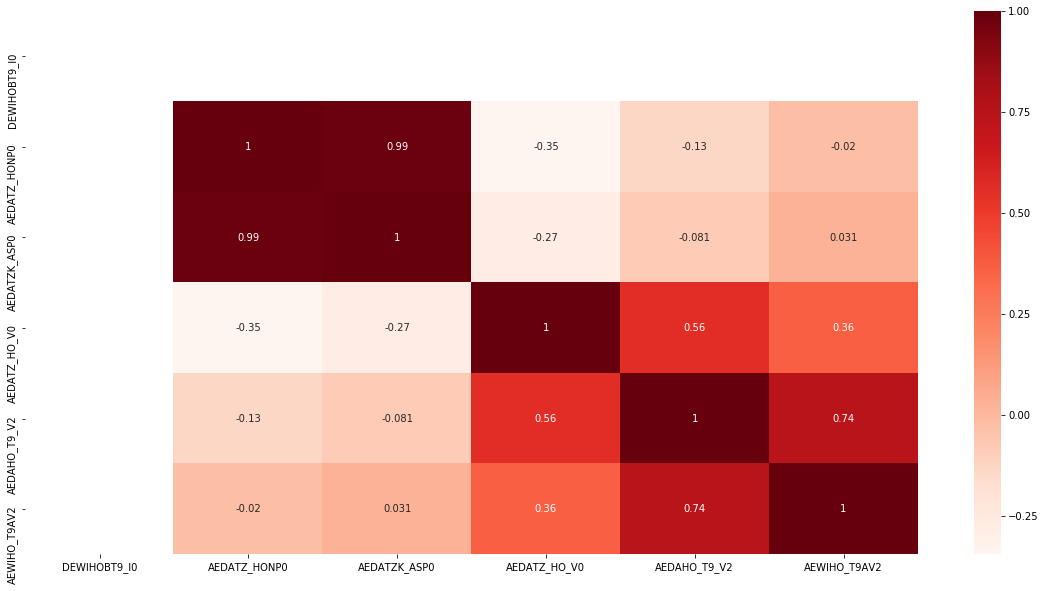

In [17]:
#Using Pearson Correlation
import seaborn as sns
plt.figure(figsize=(20,10))
# cor = multivariate_data_mean.corr()
cor = multivariate_data_drop_zero.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [18]:
#Correlation with output variable
cor_target = abs(cor["AEWIHO_T9AV2"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

AEDAHO_T9_V2    0.743431
AEWIHO_T9AV2    1.000000
Name: AEWIHO_T9AV2, dtype: float64

In [19]:


import statsmodels.api as sm
#Adding constant column of ones, mandatory for sm.OLS model
# X_1 = sm.add_constant(train_feature)
X_1 = sm.add_constant(train_feature_1)
#Fitting sm.OLS model
model = sm.OLS(a_1,X_1).fit()
model.pvalues

C:\Users\atif\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


DEWIHOBT9_I0     1.196307e-06
AEDATZ_HONP0    3.915076e-129
AEDATZK_ASP0    3.751383e-151
AEDATZ_HO_V0     6.357202e-69
AEDAHO_T9_V2     0.000000e+00
dtype: float64

In [20]:
#Backward Elimination
cols = list(train_feature_1.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = train_feature_1[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(a_1,X_1).fit()
    p = pd.Series(model.pvalues.values[0:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['DEWIHOBT9_I0', 'AEDATZ_HONP0', 'AEDATZK_ASP0', 'AEDATZ_HO_V0', 'AEDAHO_T9_V2']


C:\Users\atif\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


In [21]:
# below I have used RFE to extract feature for regression

train_feature_1 = multivariate_data_drop_zero.iloc[:,:-1]
target_feature_1 = multivariate_data_drop_zero.iloc[:,-1]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# feature extraction
model_linear = LinearRegression()
rfe_linear = RFE(model_linear, 3)
fit_linear = rfe_linear.fit(train_feature_1, target_feature_1)

print(fit_linear.support_)
print(fit_linear.ranking_)
print('\n\n')

from sklearn.svm import SVR

model_svr = SVR()

estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
selector = selector.fit(train_feature_1, target_feature_1)

print(selector.support_)
print(selector.ranking_)

[False  True  True False  True]
[3 1 1 2 1]



[ True  True  True  True  True]
[1 1 1 1 1]
